## Plot weekly trends (new cases) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama state for analysis
selected_state = "AL"
selected_county_1 = "Jefferson County "
selected_county_2 = "Madison County "
selected_county_3 = "Mobile County "
# reading the confirmed data
cases = pd.read_csv("../data/covid_confirmed_usafacts.csv")
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19205,19205,19205,19205,19205,19318,19318,19318,19318,19318
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68182,68182,68182,68182,68182,68518,68518,68518,68518,68518
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7120,7120,7120,7120,7120,7188,7188,7188,7188,7188
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7808,7808,7808,7808,7808,7855,7855,7855,7855,7855


In [3]:
# using the melt function so that we get the all the dates in one column and merging will be easy with enrichment data.
cases_transpose = pd.melt(frame = cases, id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name=["Date"],value_name='Number of Cases')
cases_transpose = cases_transpose[cases_transpose['countyFIPS'] != 0]
cases_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
cases_selected_state = cases_transpose[cases_transpose["State"] == selected_state]
cases_selected_state

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0
...,...,...,...,...,...,...
3480433,1125,Tuscaloosa County,AL,1,2023-01-16,68860
3480434,1127,Walker County,AL,1,2023-01-16,23425
3480435,1129,Washington County,AL,1,2023-01-16,4309
3480436,1131,Wilcox County,AL,1,2023-01-16,3569


In [5]:
cases_selected_county = cases_selected_state[cases_selected_state["County Name"] == selected_county_1].reset_index()
del cases_selected_county[cases_selected_county.columns[0]]

cases_selected_county


,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,1073,Jefferson County,AL,1,2020-01-22,0
1,1073,Jefferson County,AL,1,2020-01-23,0
2,1073,Jefferson County,AL,1,2020-01-24,0
3,1073,Jefferson County,AL,1,2020-01-25,0
4,1073,Jefferson County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
1086,1073,Jefferson County,AL,1,2023-01-12,229633
1087,1073,Jefferson County,AL,1,2023-01-13,229633
1088,1073,Jefferson County,AL,1,2023-01-14,229633
1089,1073,Jefferson County,AL,1,2023-01-15,229633


In [6]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_county_daily = cases_selected_county.groupby('Date')['Number of Cases'].sum()
cases_selected_county_daily

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2023-01-12    229633
2023-01-13    229633
2023-01-14    229633
2023-01-15    229633
2023-01-16    229633
Name: Number of Cases, Length: 1091, dtype: int64

In [7]:
#Finding out the new cases per day.
new_cases_selected_county_daily = cases_selected_county_daily.diff().reset_index()
new_cases_selected_county_daily

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,1133.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [8]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_cases_selected_county = new_cases_selected_county_daily.copy()
weekly_cases_selected_county['Date'] = pd.to_datetime(weekly_cases_selected_county['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_selected_county = weekly_cases_selected_county.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_selected_county = weekly_cases_selected_county.reset_index()
weekly_cases_selected_county.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [9]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_selected_county_given_range = weekly_cases_selected_county[(weekly_cases_selected_county["Date"] >= '2022-05-29') & (weekly_cases_selected_county["Date"] <= '2023-01-02')]
weekly_cases_selected_county_given_range = weekly_cases_selected_county_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_selected_county_given_range['Date'] = weekly_cases_selected_county_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_selected_county_given_range

,Date,Number of Cases
0,2022-05-30,1047.0
1,2022-06-06,1660.0
2,2022-06-13,1856.0
3,2022-06-20,1934.0
4,2022-06-27,2023.0
5,2022-07-04,2284.0
6,2022-07-11,2397.0
7,2022-07-18,2571.0
8,2022-07-25,2531.0
9,2022-08-01,1862.0


<AxesSubplot: title={'center': 'Cases of Jefferson County in Albama State'}, xlabel='Date'>

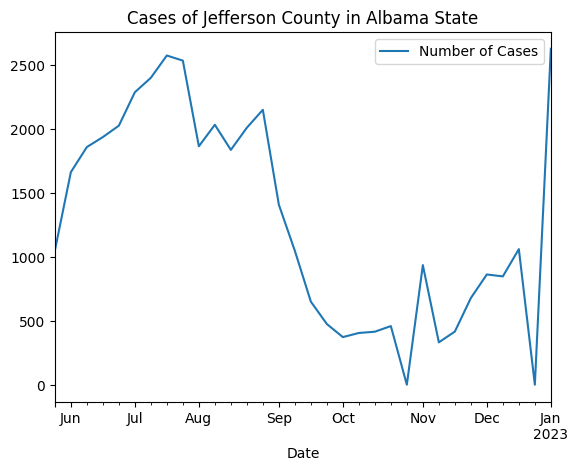

In [10]:
weekly_cases_selected_county_given_range.plot(x='Date', y='Number of Cases', title = 'Cases of Jefferson County in Albama State')

### Week starting with 2023-01-02 has a peak of cases in jefferson county with value 2624, cause can be new year long weekend and party which made lots of people to gather. Other spike is in July, cause can be independance day long weekend, people might have gathered to celebrate.

In [11]:
weekly_cases_selected_county_given_range_max_normalised = weekly_cases_selected_county_given_range.copy()
for column in weekly_cases_selected_county_given_range_max_normalised.columns:
    weekly_cases_selected_county_given_range_max_normalised['Number of Cases'] = np.log(weekly_cases_selected_county_given_range_max_normalised['Number of Cases'] + 1 ) / np.log(weekly_cases_selected_county_given_range_max_normalised['Number of Cases'].max() + 1)
display(weekly_cases_selected_county_given_range_max_normalised)

,Date,Number of Cases
0,2022-05-30,0.913318
1,2022-06-06,0.957445
2,2022-06-13,0.967933
3,2022-06-20,0.971783
4,2022-06-27,0.975978
5,2022-07-04,0.987234
6,2022-07-11,0.991689
7,2022-07-18,0.998130
8,2022-07-25,0.996691
9,2022-08-01,0.968235


<AxesSubplot: title={'center': 'Log Normalized plot of cases of Jefferson County in Albama State'}, xlabel='Date'>

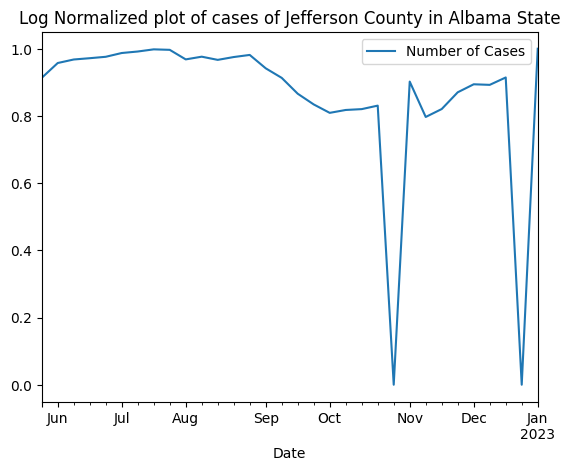

In [12]:
weekly_cases_selected_county_given_range_max_normalised.plot(x='Date', y='Number of Cases', title = 'Log Normalized plot of cases of Jefferson County in Albama State')

In [13]:
cases_selected_county_2 = cases_selected_state[cases_selected_state["County Name"] == selected_county_2].reset_index()
del cases_selected_county_2[cases_selected_county_2.columns[0]]
cases_selected_county_2

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,1089,Madison County,AL,1,2020-01-22,0
1,1089,Madison County,AL,1,2020-01-23,0
2,1089,Madison County,AL,1,2020-01-24,0
3,1089,Madison County,AL,1,2020-01-25,0
4,1089,Madison County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
1086,1089,Madison County,AL,1,2023-01-12,113105
1087,1089,Madison County,AL,1,2023-01-13,113105
1088,1089,Madison County,AL,1,2023-01-14,113105
1089,1089,Madison County,AL,1,2023-01-15,113105


In [14]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_county_daily_2 = cases_selected_county_2.groupby('Date')['Number of Cases'].sum()
cases_selected_county_daily_2

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2023-01-12    113105
2023-01-13    113105
2023-01-14    113105
2023-01-15    113105
2023-01-16    113105
Name: Number of Cases, Length: 1091, dtype: int64

In [15]:
#Finding out the new cases per day.
new_cases_selected_county_daily_2 = cases_selected_county_daily_2.diff().reset_index()
new_cases_selected_county_daily_2

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,626.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [16]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_cases_selected_county_2 = new_cases_selected_county_daily_2.copy()
weekly_cases_selected_county_2['Date'] = pd.to_datetime(weekly_cases_selected_county_2['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_selected_county_2 = weekly_cases_selected_county_2.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_selected_county_2 = weekly_cases_selected_county_2.reset_index()
weekly_cases_selected_county_2.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [17]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_selected_county_given_range_2 = weekly_cases_selected_county_2[(weekly_cases_selected_county_2["Date"] >= '2022-05-29') & (weekly_cases_selected_county_2["Date"] <= '2023-01-02')]
weekly_cases_selected_county_given_range_2 = weekly_cases_selected_county_given_range_2.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_selected_county_given_range_2['Date'] = weekly_cases_selected_county_given_range_2['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_selected_county_given_range_2

,Date,Number of Cases
0,2022-05-30,685.0
1,2022-06-06,875.0
2,2022-06-13,756.0
3,2022-06-20,816.0
4,2022-06-27,1013.0
5,2022-07-04,997.0
6,2022-07-11,1135.0
7,2022-07-18,1155.0
8,2022-07-25,1278.0
9,2022-08-01,815.0


<AxesSubplot: title={'center': 'Cases of Madison County in Albama State'}, xlabel='Date'>

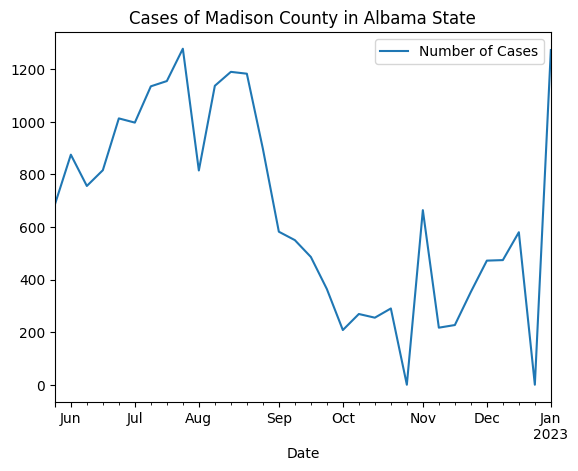

In [18]:
weekly_cases_selected_county_given_range_2.plot(x='Date', y='Number of Cases', title = 'Cases of Madison County in Albama State')

### Week starting with 2022-07-25 has peak of cases in Madison county with value 1278, even though peak is in last week of july, we can see higher trend from start of july. This can be because of independance day holiday. Other spike is in January first week which might be because of new year celebrations.

In [19]:
weekly_cases_selected_county_given_range_2_max_normalised = weekly_cases_selected_county_given_range_2.copy()
for column in weekly_cases_selected_county_given_range_2_max_normalised.columns:
    weekly_cases_selected_county_given_range_2_max_normalised['Number of Cases'] = np.log(weekly_cases_selected_county_given_range_2_max_normalised['Number of Cases'] + 1 ) / np.log(weekly_cases_selected_county_given_range_2_max_normalised['Number of Cases'].max() + 1)
display(weekly_cases_selected_county_given_range_2_max_normalised)

,Date,Number of Cases
0,2022-05-30,0.935777
1,2022-06-06,0.961324
2,2022-06-13,0.946122
3,2022-06-20,0.954084
4,2022-06-27,0.976397
5,2022-07-04,0.974766
6,2022-07-11,0.987995
7,2022-07-18,0.989768
8,2022-07-25,1.000000
9,2022-08-01,0.953956


<AxesSubplot: title={'center': 'Log normalized plot of cases of Madison County in Albama State'}, xlabel='Date'>

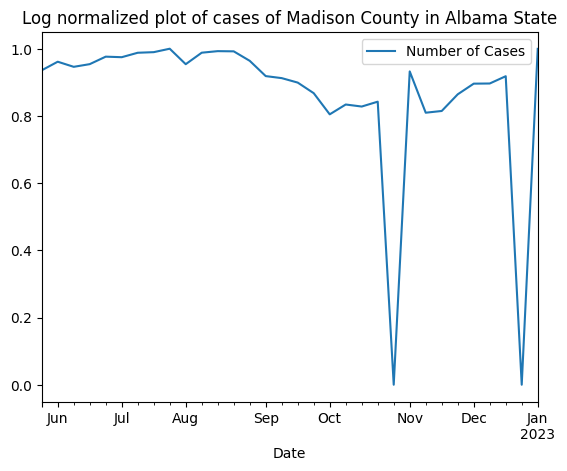

In [20]:
weekly_cases_selected_county_given_range_2_max_normalised.plot(x='Date', y='Number of Cases', title = 'Log normalized plot of cases of Madison County in Albama State')

In [21]:
cases_selected_county_3 = cases_selected_state[cases_selected_state["County Name"] == selected_county_3].reset_index()
del cases_selected_county_3[cases_selected_county_3.columns[0]]
cases_selected_county_3

,countyFIPS,County Name,State,StateFIPS,Date,Number of Cases
0,1097,Mobile County,AL,1,2020-01-22,0
1,1097,Mobile County,AL,1,2020-01-23,0
2,1097,Mobile County,AL,1,2020-01-24,0
3,1097,Mobile County,AL,1,2020-01-25,0
4,1097,Mobile County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
1086,1097,Mobile County,AL,1,2023-01-12,132438
1087,1097,Mobile County,AL,1,2023-01-13,132438
1088,1097,Mobile County,AL,1,2023-01-14,132438
1089,1097,Mobile County,AL,1,2023-01-15,132438


In [22]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_county_daily_3 = cases_selected_county_3.groupby('Date')['Number of Cases'].sum()
cases_selected_county_daily_3

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2023-01-12    132438
2023-01-13    132438
2023-01-14    132438
2023-01-15    132438
2023-01-16    132438
Name: Number of Cases, Length: 1091, dtype: int64

In [23]:
#Finding out the new cases per day.
new_cases_selected_county_daily_3 = cases_selected_county_daily_3.diff().reset_index()
new_cases_selected_county_daily_3

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,590.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [24]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_cases_selected_county_3 = new_cases_selected_county_daily_3.copy()
weekly_cases_selected_county_3['Date'] = pd.to_datetime(weekly_cases_selected_county_3['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_selected_county_3 = weekly_cases_selected_county_3.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_selected_county_3 = weekly_cases_selected_county_3.reset_index()
weekly_cases_selected_county_3.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [25]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_selected_county_given_range_3 = weekly_cases_selected_county_3[(weekly_cases_selected_county_3["Date"] >= '2022-05-29') & (weekly_cases_selected_county_3["Date"] <= '2023-01-02')]
weekly_cases_selected_county_given_range_3 = weekly_cases_selected_county_given_range_3.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_selected_county_given_range_3['Date'] = weekly_cases_selected_county_given_range_3['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_selected_county_given_range_3

,Date,Number of Cases
0,2022-05-30,280.0
1,2022-06-06,614.0
2,2022-06-13,680.0
3,2022-06-20,867.0
4,2022-06-27,1051.0
5,2022-07-04,1053.0
6,2022-07-11,1428.0
7,2022-07-18,1393.0
8,2022-07-25,1261.0
9,2022-08-01,903.0


<AxesSubplot: title={'center': 'Cases of Mobile County in Albama State'}, xlabel='Date'>

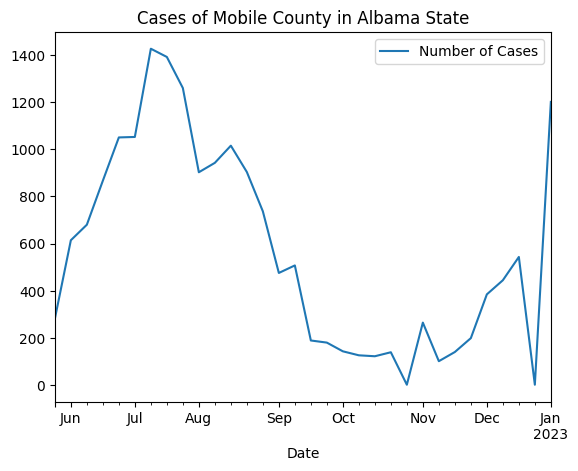

In [26]:
weekly_cases_selected_county_given_range_3.plot(x='Date', y='Number of Cases', title = 'Cases of Mobile County in Albama State')

### Week starting with 2022-07-11 has peak of cases in moblie county with value 1428,cause can be independance day long weekend holiday, people might have gathered to celebrate.

In [27]:
weekly_cases_selected_county_given_range_3_max_normalised = weekly_cases_selected_county_given_range_3.copy()
for column in weekly_cases_selected_county_given_range_3_max_normalised.columns:
    weekly_cases_selected_county_given_range_3_max_normalised['Number of Cases'] = np.log(weekly_cases_selected_county_given_range_3_max_normalised['Number of Cases'] + 1 ) / np.log(weekly_cases_selected_county_given_range_3_max_normalised['Number of Cases'].max() + 1)
display(weekly_cases_selected_county_given_range_3_max_normalised)

,Date,Number of Cases
0,2022-05-30,0.828735
1,2022-06-06,0.913757
2,2022-06-13,0.924463
3,2022-06-20,0.949629
4,2022-06-27,0.969263
5,2022-07-04,0.969455
6,2022-07-11,1.000000
7,2022-07-18,0.997536
8,2022-07-25,0.987607
9,2022-08-01,0.953801


<AxesSubplot: title={'center': 'Log normalized plot of cases of Mobile County in Albama State'}, xlabel='Date'>

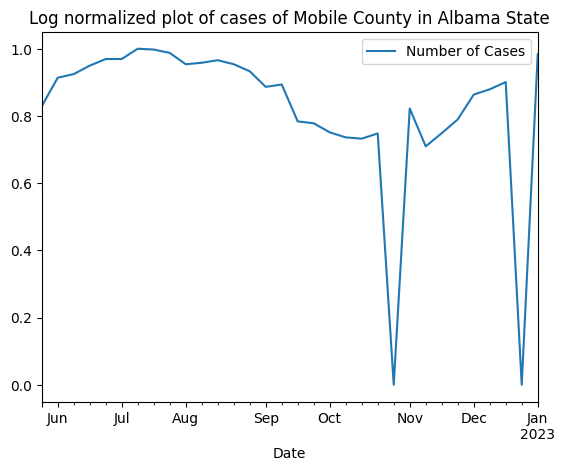

In [28]:
weekly_cases_selected_county_given_range_3_max_normalised.plot(x='Date', y='Number of Cases', title = 'Log normalized plot of cases of Mobile County in Albama State')

In [29]:
#For the selected state Albama summing the deaths per day of all the counties.
cases_selected_state_daily = cases_selected_state.groupby('Date')['Number of Cases'].sum()
cases_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Cases, dtype: int64

In [30]:
#Finding out the new cases per day.
new_cases_selected_state_daily = cases_selected_state_daily.diff().reset_index()
new_cases_selected_state_daily.head()

,Date,Number of Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [31]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_cases_sum_selected_state = new_cases_selected_state_daily.copy()
weekly_cases_sum_selected_state['Date'] = pd.to_datetime(weekly_cases_sum_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_cases_sum_selected_state = weekly_cases_sum_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Cases'].sum()
weekly_cases_sum_selected_state = weekly_cases_sum_selected_state.reset_index()
weekly_cases_sum_selected_state.head()

,Date,Number of Cases
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [32]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_cases_sum_selected_state_given_range = weekly_cases_sum_selected_state[(weekly_cases_sum_selected_state["Date"] >= '2022-05-29') & (weekly_cases_sum_selected_state["Date"] <= '2023-01-02')]
weekly_cases_sum_selected_state_given_range = weekly_cases_sum_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_cases_sum_selected_state_given_range['Date'] = weekly_cases_sum_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_cases_sum_selected_state_given_range

,Date,Number of Cases
0,2022-05-30,5648.0
1,2022-06-06,8332.0
2,2022-06-13,9620.0
3,2022-06-20,11287.0
4,2022-06-27,12783.0
5,2022-07-04,14633.0
6,2022-07-11,16649.0
7,2022-07-18,17366.0
8,2022-07-25,16712.0
9,2022-08-01,12047.0


In [33]:
#getting the normalised values for state.
weekly_cases_selected_state_given_range_max_normalised = weekly_cases_sum_selected_state_given_range.copy()
for column in weekly_cases_selected_state_given_range_max_normalised.columns:
    weekly_cases_selected_state_given_range_max_normalised['Number of Cases'] = np.log(weekly_cases_selected_state_given_range_max_normalised['Number of Cases'] + 1 ) / np.log(weekly_cases_selected_state_given_range_max_normalised['Number of Cases'].max() + 1)
display(weekly_cases_selected_state_given_range_max_normalised)

,Date,Number of Cases
0,2022-05-30,0.910949
1,2022-06-06,0.941026
2,2022-06-13,0.951989
3,2022-06-20,0.964080
4,2022-06-27,0.973428
5,2022-07-04,0.983511
6,2022-07-11,0.993074
7,2022-07-18,0.996185
8,2022-07-25,0.993353
9,2022-08-01,0.968982


<AxesSubplot: title={'center': 'Log normalized plot of cases  in Albama State'}, xlabel='Date'>

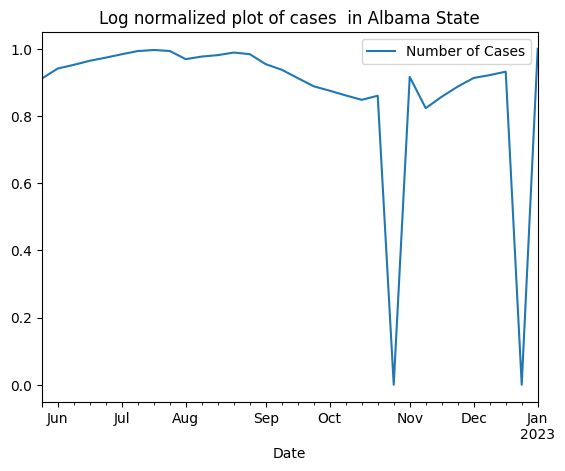

In [34]:
weekly_cases_selected_state_given_range_max_normalised.plot(x='Date', y='Number of Cases', title = 'Log normalized plot of cases  in Albama State')

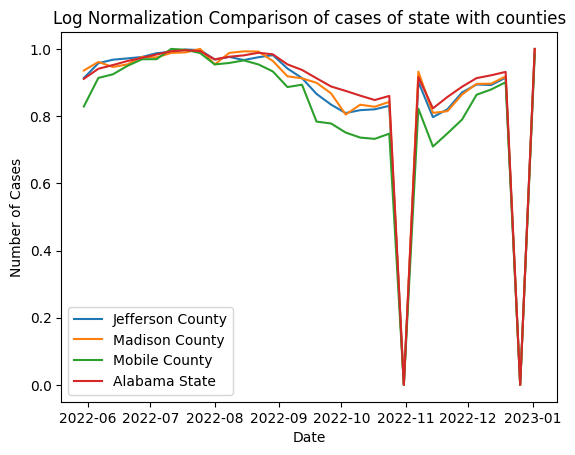

In [35]:
plt.plot(weekly_cases_selected_county_given_range_max_normalised['Date'], weekly_cases_selected_county_given_range_max_normalised['Number of Cases'], label='Jefferson County')
plt.plot(weekly_cases_selected_county_given_range_2_max_normalised['Date'], weekly_cases_selected_county_given_range_2_max_normalised['Number of Cases'], label='Madison County')
plt.plot(weekly_cases_selected_county_given_range_3_max_normalised['Date'], weekly_cases_selected_county_given_range_3_max_normalised['Number of Cases'], label='Mobile County')
plt.plot(weekly_cases_selected_state_given_range_max_normalised['Date'], weekly_cases_selected_state_given_range_max_normalised['Number of Cases'], label='Alabama State')
plt.title('Log Normalization Comparison of cases of state with counties')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

### Yes all three Counties(Jefferson County,Madison County,Mobile County) are following the State pattern(Alabama State).